<a href="https://colab.research.google.com/github/Claucs88/An-lisis_Evasi-n_Clientes/blob/main/An%C3%A1lisis_evasi%C3%B3n_de_clientes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#🛠️ **Preparación de los Datos**

In [5]:
# Importar datos

import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('/content/datos_limpios_TelecomX_LATAM.csv')

df.head()



,customerID,Churn,Genero,Mayor_65,customer.Partner,customer.Dependents,Meses_Contrato,phone.PhoneService,phone.MultipleLines,internet.InternetService,...,internet.TechSupport,internet.StreamingTV,internet.StreamingMovies,Tipo_Contrato,account.PaperlessBilling,Metodo_Pago,Cargos_Mensuales,Cargos_Totales,Gasto_Diario,Servicios_Contratados
0,0002-ORFBO,0,0,0,1,1,9,1,0,DSL,...,1,1,0,One year,1,Mailed check,65.6,593.30,2.19,4
1,0003-MKNFE,0,1,0,0,0,9,1,1,DSL,...,0,0,1,Month-to-month,0,Mailed check,59.9,542.40,2.00,3
2,0004-TLHLJ,1,1,0,0,0,4,1,0,Fiber optic,...,0,0,0,Month-to-month,1,Electronic check,73.9,280.85,2.46,2
3,0011-IGKFF,1,1,1,1,0,13,1,0,Fiber optic,...,0,1,1,Month-to-month,1,Electronic check,98.0,1237.85,3.27,5
4,0013-EXCHZ,1,0,1,1,0,3,1,0,Fiber optic,...,1,1,0,Month-to-month,1,Mailed check,83.9,267.40,2.80,3


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerID                 7032 non-null   object 
 1   Churn                      7032 non-null   int64  
 2   Genero                     7032 non-null   int64  
 3   Mayor_65                   7032 non-null   int64  
 4   customer.Partner           7032 non-null   int64  
 5   customer.Dependents        7032 non-null   int64  
 6   Meses_Contrato             7032 non-null   int64  
 7   phone.PhoneService         7032 non-null   int64  
 8   phone.MultipleLines        7032 non-null   int64  
 9   internet.InternetService   7032 non-null   object 
 10  internet.OnlineSecurity    7032 non-null   int64  
 11  internet.OnlineBackup      7032 non-null   int64  
 12  internet.DeviceProtection  7032 non-null   int64  
 13  internet.TechSupport       7032 non-null   int64

## **Eliminar columnas irrelevantes**

In [7]:
# 1. ELIMINAR COLUMNAS IRRELEVANTES
# =========================

# Eliminamos customerID porque no aporta información útil para predecir el churn
df = df.drop(columns=['customerID'])

# Verificamos que la columna se eliminó correctamente
print("Columnas después de eliminar customerID:\n", df.columns)



Columnas después de eliminar customerID:
 Index(['Churn', 'Genero', 'Mayor_65', 'customer.Partner',
       'customer.Dependents', 'Meses_Contrato', 'phone.PhoneService',
       'phone.MultipleLines', 'internet.InternetService',
       'internet.OnlineSecurity', 'internet.OnlineBackup',
       'internet.DeviceProtection', 'internet.TechSupport',
       'internet.StreamingTV', 'internet.StreamingMovies', 'Tipo_Contrato',
       'account.PaperlessBilling', 'Metodo_Pago', 'Cargos_Mensuales',
       'Cargos_Totales', 'Gasto_Diario', 'Servicios_Contratados'],
      dtype='object')


## **Encoding**

In [8]:


# Identificamos las columnas categóricas
columnas_categoricas = ['internet.InternetService', 'Tipo_Contrato', 'Metodo_Pago']

# Verificamos los valores únicos antes de codificar
for col in columnas_categoricas:
    print(f"\nColumna: {col}")
    print(df[col].unique())

# Aplicamos One-Hot Encoding con get_dummies
df_encoded = pd.get_dummies(df, columns=columnas_categoricas, drop_first=True)

# =========================
# 3. VERIFICAR RESULTADO
# =========================

print("\nDimensiones originales del DataFrame:", df.shape)
print("Dimensiones después del One-Hot Encoding:", df_encoded.shape)

# Mostramos las primeras filas para ver los cambios
df_encoded.head()


Columna: internet.InternetService
['DSL' 'Fiber optic' 'No']

Columna: Tipo_Contrato
['One year' 'Month-to-month' 'Two year']

Columna: Metodo_Pago
['Mailed check' 'Electronic check' 'Credit card (automatic)'
 'Bank transfer (automatic)']

Dimensiones originales del DataFrame: (7032, 22)
Dimensiones después del One-Hot Encoding: (7032, 26)


,Churn,Genero,Mayor_65,customer.Partner,customer.Dependents,Meses_Contrato,phone.PhoneService,phone.MultipleLines,internet.OnlineSecurity,internet.OnlineBackup,...,Cargos_Totales,Gasto_Diario,Servicios_Contratados,internet.InternetService_Fiber optic,internet.InternetService_No,Tipo_Contrato_One year,Tipo_Contrato_Two year,Metodo_Pago_Credit card (automatic),Metodo_Pago_Electronic check,Metodo_Pago_Mailed check
0,0,0,0,1,1,9,1,0,0,1,...,593.30,2.19,4,False,False,True,False,False,False,True
1,0,1,0,0,0,9,1,1,0,0,...,542.40,2.00,3,False,False,False,False,False,False,True
2,1,1,0,0,0,4,1,0,0,0,...,280.85,2.46,2,True,False,False,False,False,True,False
3,1,1,1,1,0,13,1,0,0,1,...,1237.85,3.27,5,True,False,False,False,False,True,False
4,1,0,1,1,0,3,1,0,0,0,...,267.40,2.80,3,True,False,False,False,False,False,True


## **Verificación de la Proporción de Cancelación (Churn)**

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:


# 1. CANTIDAD DE CLIENTES SEGÚN CHURN

conteo_churn = df_encoded['Churn'].value_counts()
print("Cantidad de clientes por estado de churn:")
print(conteo_churn)


# 2. PROPORCIÓN (PORCENTAJE) DE CHURN

proporcion_churn = df_encoded['Churn'].value_counts(normalize=True) * 100
print("\nProporción (%) de clientes por estado de churn:")
print(proporcion_churn)




Cantidad de clientes por estado de churn:
Churn
0    5163
1    1869
Name: count, dtype: int64

Proporción (%) de clientes por estado de churn:
Churn
0    73.421502
1    26.578498
Name: proportion, dtype: float64


/tmp/ipython-input-3389289055.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=df_encoded, palette='Set2')


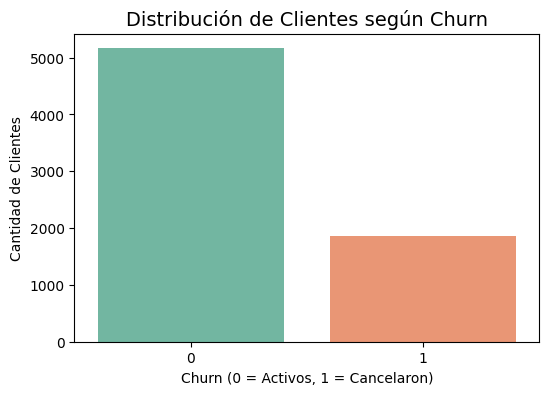

In [11]:

# 3. VISUALIZACIÓN GRÁFICA

plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df_encoded, palette='Set2')
plt.title('Distribución de Clientes según Churn', fontsize=14)
plt.xlabel('Churn (0 = Activos, 1 = Cancelaron)')
plt.ylabel('Cantidad de Clientes')
plt.show()

**1. Análisis de los resultados del gráfico y las proporciones**

De acuerdo con los datos:

Clientes activos (Churn = 0): 5,163 → 73.4%

Clientes que cancelaron (Churn = 1): 1,869 → 26.6%

Conclusión:

**Existe desbalance de clases moderado:**

La mayoría de los clientes no cancelaron.

Un 26.6% sí canceló, lo que no es extremadamente bajo, pero suficiente para que algunos modelos de Machine Learning tiendan a sesgarse hacia la clase mayoritaria.

Si entrenamos un modelo sin corregirlo, es posible que prediga que todos los clientes son “activos”, obteniendo una alta precisión global, pero bajo recall para la clase minoritaria (clientes que cancelan).

Por eso, realizaremos un Balanceo de clases.

## **Balanceo de clases**

### **Oversampling**

In [12]:
from imblearn.over_sampling import SMOTE
from collections import Counter


# 1. Separar características y variable objetivo

X = df_encoded.drop(columns=['Churn'])
y = df_encoded['Churn']

# 2. Aplicar SMOTE para oversampling

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


# 3. Verificar nuevo balance de clases

print("Distribución original:", Counter(y))
print("Distribución después de SMOTE:", Counter(y_resampled))


Distribución original: Counter({0: 5163, 1: 1869})
Distribución después de SMOTE: Counter({0: 5163, 1: 5163})


## Normalización o Estandarización**


In [13]:
from sklearn.preprocessing import StandardScaler


# 1. Seleccionamos columnas numéricas a estandarizar

columnas_numericas = ['Meses_Contrato', 'Cargos_Mensuales',
                      'Cargos_Totales', 'Gasto_Diario', 'Servicios_Contratados']

# Creamos una copia para no modificar X_resampled original
X_scaled = X_resampled.copy()

# Inicializamos el StandardScaler
scaler = StandardScaler()

# Aplicamos la estandarización
X_scaled[columnas_numericas] = scaler.fit_transform(X_scaled[columnas_numericas])

# Verificamos el resultado
print(X_scaled[columnas_numericas].describe().round(2))


       Meses_Contrato  Cargos_Mensuales  Cargos_Totales  Gasto_Diario  \
count        10326.00          10326.00        10326.00      10326.00   
mean            -0.00              0.00            0.00         -0.00   
std              1.00              1.00            1.00          1.00   
min             -1.11             -1.74           -0.93         -1.73   
25%             -0.95             -0.78           -0.81         -0.78   
50%             -0.28              0.24           -0.40          0.23   
75%              0.89              0.80            0.56          0.80   
max              1.85              1.77            3.03          1.77   

       Servicios_Contratados  
count               10326.00  
mean                   -0.00  
std                     1.00  
min                    -1.65  
25%                    -0.62  
50%                    -0.11  
75%                     0.92  
max                     2.46  


# **Correlación y Selección de Variables**

## **Análisis de Correlación**

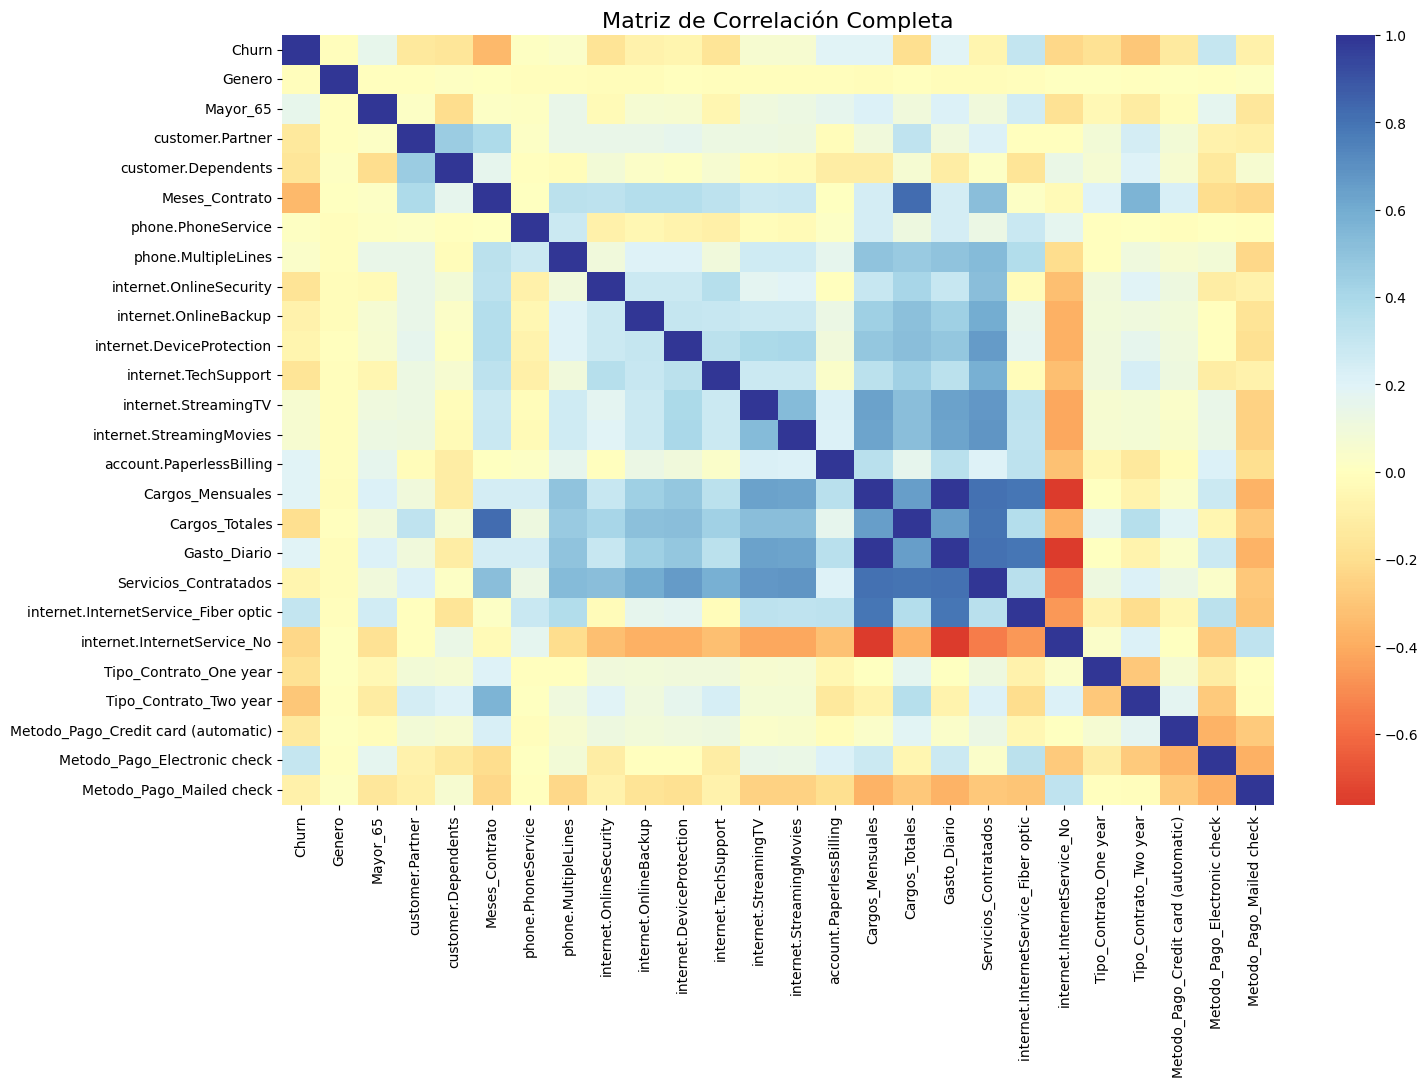

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


# 1. MATRIZ DE CORRELACIÓN COMPLETA

plt.figure(figsize=(16,10))
sns.heatmap(df_encoded.corr(), cmap='RdYlBu', annot=False, center=0)
plt.title('Matriz de Correlación Completa', fontsize=16)
plt.show()


## **Correlación específica con Churn**

Top 15 variables más correlacionadas con Churn:

Churn                                   1.000000
internet.InternetService_Fiber optic    0.307463
Metodo_Pago_Electronic check            0.301455
Gasto_Diario                            0.192914
Cargos_Mensuales                        0.192858
account.PaperlessBilling                0.191454
Mayor_65                                0.150541
internet.StreamingTV                    0.063254
internet.StreamingMovies                0.060860
phone.MultipleLines                     0.040033
phone.PhoneService                      0.011691
Genero                                 -0.008545
internet.DeviceProtection              -0.066193
Servicios_Contratados                  -0.067459
internet.OnlineBackup                  -0.082307
Name: Churn, dtype: float64


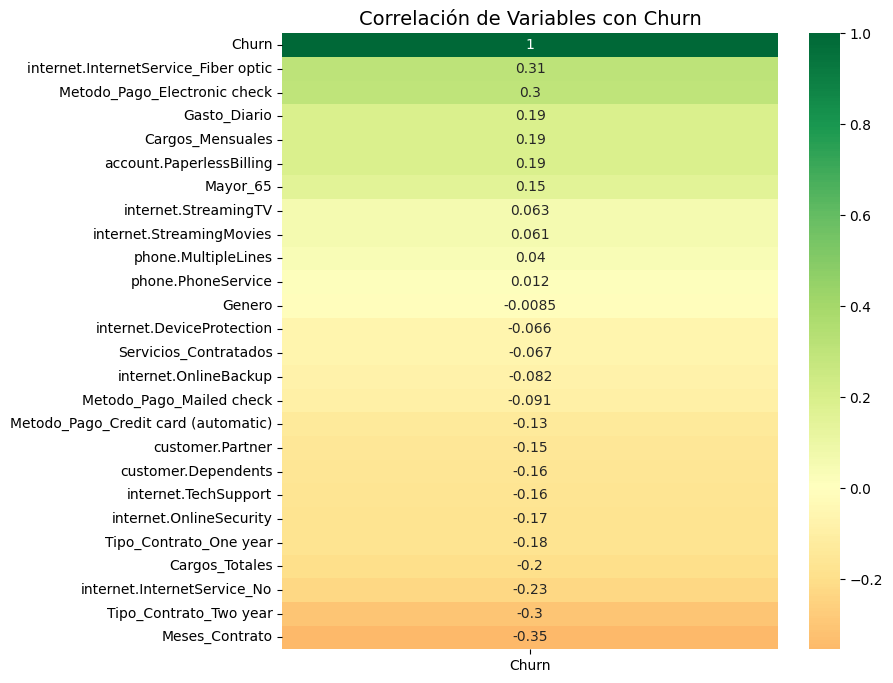

In [15]:

# 2. CORRELACIÓN CON LA VARIABLE CHURN


# Calculamos correlaciones absolutas con churn
correlacion_churn = df_encoded.corr()['Churn'].sort_values(ascending=False)

# Mostramos las 15 variables más correlacionadas
print("Top 15 variables más correlacionadas con Churn:\n")
print(correlacion_churn.head(15))


# 3. VISUALIZACIÓN

plt.figure(figsize=(8,8))
sns.heatmap(correlacion_churn.to_frame(), annot=True, cmap='RdYlGn', center=0)
plt.title('Correlación de Variables con Churn', fontsize=14)
plt.show()


**Los factores más relevantes asociados a un mayor riesgo de churn son:**

Tipo de servicio de internet

Método de pago

Monto de los cargos

Uso de facturación electrónica


**Principales factores que influyen en la cancelación (Churn)**

El análisis de correlación muestra que uno de los factores más relevantes asociados a la cancelación es el tipo de servicio de internet. Los clientes que tienen contratado fibra óptica presentan una mayor probabilidad de cancelar en comparación con quienes usan otros servicios. Esto puede deberse a problemas de satisfacción, precios más elevados o una mayor competencia en ese segmento.

Otro factor importante es el método de pago. Los clientes que utilizan cheque electrónico para pagar sus cuentas tienen una mayor tendencia a cancelar el servicio. Esto podría indicar que este grupo de clientes prefiere opciones más flexibles o está asociado a planes menos estables.

El costo del servicio también influye significativamente. Tanto el gasto diario promedio como los cargos mensuales tienen correlaciones positivas con la cancelación, lo que significa que los clientes que pagan tarifas más altas tienden a abandonar el servicio con mayor frecuencia. Este hallazgo sugiere que la sensibilidad al precio es un factor determinante en el churn.

La facturación electrónica es otro aspecto relevante. Los clientes que tienen activada la facturación sin papel presentan un mayor riesgo de cancelación. Esto podría estar relacionado con planes de renovación automática o con segmentos de clientes más digitales, que también podrían estar más expuestos a ofertas de la competencia.

Además, se observa que los clientes mayores de 65 años tienen una mayor probabilidad de cancelar sus servicios. Esto puede deberse a cambios en los hábitos de consumo, menor afinidad con servicios digitales o necesidades distintas respecto al uso de telecomunicaciones.

Por otro lado, también encontramos variables que actúan como factores protectores frente a la cancelación. Los clientes que contratan servicios adicionales, como respaldo en línea y protección de dispositivos, muestran una menor probabilidad de abandonar la empresa. Asimismo, quienes tienen varios servicios contratados tienden a permanecer más tiempo como clientes, lo que indica que la venta de paquetes combinados favorece la fidelización.

## **Análisis Dirigido**

**Analizaremos dos puntos principales:**

- Tiempo de contrato por Cancelación → Ver si los clientes con contratos más
cortos tienden a cancelar más.

- Gasto total por Cancelación → Ver si los clientes con mayores cargos totales presentan mayor probabilidad de churn.

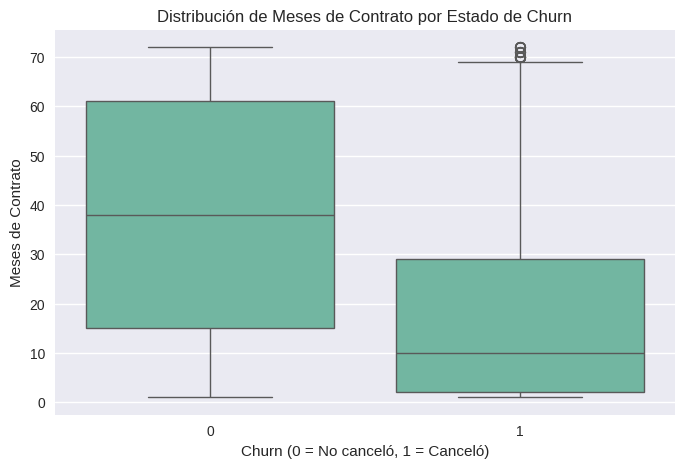

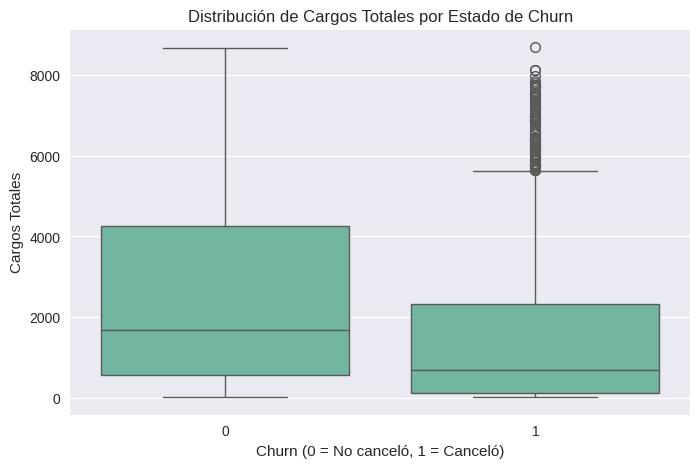

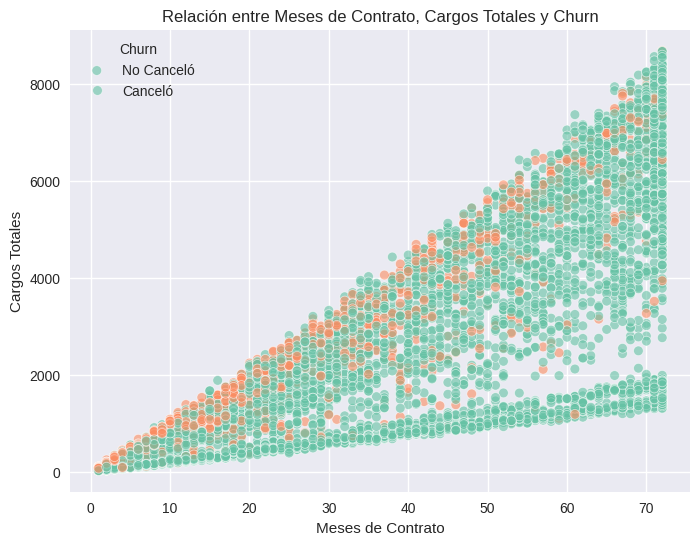

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo
plt.style.use('seaborn-v0_8')
sns.set_palette("Set2")

# 1. Boxplot: Tiempo de contrato vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn", y="Meses_Contrato")
plt.title("Distribución de Meses de Contrato por Estado de Churn")
plt.xlabel("Churn (0 = No canceló, 1 = Canceló)")
plt.ylabel("Meses de Contrato")
plt.show()

# 2. Boxplot: Cargos Totales vs Churn
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x="Churn", y="Cargos_Totales")
plt.title("Distribución de Cargos Totales por Estado de Churn")
plt.xlabel("Churn (0 = No canceló, 1 = Canceló)")
plt.ylabel("Cargos Totales")
plt.show()

# 3. Scatter plot: Cargos Totales vs Meses de Contrato, coloreado por Churn
plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x="Meses_Contrato", y="Cargos_Totales", hue="Churn", alpha=0.6)
plt.title("Relación entre Meses de Contrato, Cargos Totales y Churn")
plt.xlabel("Meses de Contrato")
plt.ylabel("Cargos Totales")
plt.legend(title="Churn", labels=["No Canceló", "Canceló"])
plt.show()


**Análisis de los gráficos:**
1. Clientes que NO cancelaron (Churn = 0)

La mediana de meses de contrato está alrededor de 38 meses, lo que significa que la mayoría de los clientes que permanecen tienen contratos más largos.

El rango intercuartílico (IQR) —la zona central de la caja— va aproximadamente de 15 a 61 meses, lo que indica bastante dispersión.

También hay clientes con contratos muy cortos que no cancelaron, pero son menos frecuentes.

2. Clientes que SÍ cancelaron (Churn = 1)

La mediana de meses de contrato está cerca de 10 meses, mucho más baja que en el grupo que no canceló.

El 50% de los clientes que cancelaron tienen contratos entre 2 y 29 meses, mostrando que la mayoría abandona temprano.

Hay algunos casos atípicos (outliers) de clientes con contratos largos que aún así cancelaron, pero son minoría.

3. Comparativa general

Existe una clara tendencia:
Mientras más corto es el contrato, mayor es la probabilidad de cancelación.

Esto sugiere que la fidelización ocurre a medida que los clientes permanecen más tiempo con la compañía.

# **Modelo Predictivo**

## **Separación de Datos**

In [17]:
from sklearn.model_selection import train_test_split

# =========================
# 1. División en train/test
# =========================
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,   # características (ya estandarizadas)
    y_resampled, # variable objetivo balanceada
    test_size=0.3,   # 30% para prueba
    random_state=42, # semilla para reproducibilidad
    stratify=y_resampled # mantiene la proporción de clases
)

# =========================
# 2. Verificación de tamaños
# =========================
print("Tamaño del conjunto de entrenamiento:", X_train.shape[0])
print("Tamaño del conjunto de prueba:", X_test.shape[0])
print("Distribución en entrenamiento:", y_train.value_counts(normalize=True))
print("Distribución en prueba:", y_test.value_counts(normalize=True))


Tamaño del conjunto de entrenamiento: 7228
Tamaño del conjunto de prueba: 3098
Distribución en entrenamiento: Churn
1    0.5
0    0.5
Name: proportion, dtype: float64
Distribución en prueba: Churn
1    0.5
0    0.5
Name: proportion, dtype: float64


## **Creación de Modelos**

Para la para creación de modelos, dos enfoques distintos:

**1. Modelo sensible a la escala** Regresión Logística (usa los datos estandarizados X_scaled).

**2. Modelo insensible a la escala** Random Forest (usa los datos sin escalar X_resampled).

### **Modelo 1: Regresión Logística (con normalización)**

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Entrenamos el modelo con datos normalizados
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predicciones
y_pred_log = log_reg.predict(X_test)

# Evaluación
print("📊 Regresión Logística")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_log))


📊 Regresión Logística
Accuracy: 0.8282763072950291

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      1549
           1       0.83      0.83      0.83      1549

    accuracy                           0.83      3098
   macro avg       0.83      0.83      0.83      3098
weighted avg       0.83      0.83      0.83      3098


Matriz de Confusión:
 [[1285  264]
 [ 268 1281]]


**Accuracy:** 82.8%

**Precisión y Recall (ambas ≈ 0.83)** para clientes que cancelan y los que no cancelan.

**Matriz de confusión:**

Predijo bien 1,285 clientes que no cancelaron y 1,281 que sí cancelaron.

Tuvo 264 falsos positivos (predijo que cancelarían pero no lo hicieron) y 268 falsos negativos (no predijo churn pero sí cancelaron).

**Conclusión**

 Es un modelo equilibrado y estable, con desempeño simétrico en ambas clases. Sirve como baseline interpretativo, ya que permite analizar los coeficientes de las variables y entender mejor qué factores impactan en la cancelación.

### **Modelo 2: Random Forest (sin normalización)**

In [19]:
from sklearn.ensemble import RandomForestClassifier

# Entrenamos el modelo con datos sin escalar
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

# Predicciones
y_pred_rf = rf.predict(X_test)

# Evaluación
print("🌲 Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nMatriz de Confusión:\n", confusion_matrix(y_test, y_pred_rf))


🌲 Random Forest
Accuracy: 0.8437701743060039

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.83      0.84      1549
           1       0.83      0.86      0.85      1549

    accuracy                           0.84      3098
   macro avg       0.84      0.84      0.84      3098
weighted avg       0.84      0.84      0.84      3098


Matriz de Confusión:
 [[1282  267]
 [ 217 1332]]


**Accuracy: 84.4%** (ligeramente mejor que la regresión logística).

**Precisión y Recall:** Balanceados pero con un recall ligeramente mayor en la clase 1 (cancelaron) → significa que detecta mejor a los clientes que realmente abandonan.

**Matriz de confusión:**

Predijo bien 1,282 clientes que no cancelaron y 1,332 que sí cancelaron.

Redujo los falsos negativos a 217 (mejor que la logística), aunque aumentó levemente los falsos positivos (267).

## **Evaluación de los modelos**

**Modelo 1: Regresión Logística**

·Accuracy (exactitud): 82.8%

·Precisión: 0.83

·Recall: 0.83

·F1-score: 0.83

**Matriz de confusión:**

Verdaderos Negativos (no cancelaron correctamente): 1,285

Falsos Positivos (predijo churn pero no cancelaron): 264

Falsos Negativos (no predijo churn pero sí cancelaron): 268

Verdaderos Positivos (cancelaron correctamente): 1,281

El modelo es balanceado, con un rendimiento estable en ambas clases. Sirve como modelo base interpretativo, aunque pierde algo de sensibilidad en detectar clientes que realmente cancelan (recall).


**Modelo 2: Random Forest**

·Accuracy (exactitud): 84.4%

·Precisión: 0.84 (clase 1 ≈ 0.83, clase 0 ≈ 0.86)

·Recall: 0.84 (clase 1 ≈ 0.86, clase 0 ≈ 0.83)

·F1-score: 0.85 (para clase 1, cancelaron)

**Matriz de confusión:**

Verdaderos Negativos: 1,282

Falsos Positivos: 267

Falsos Negativos: 217 (mejora respecto a la logística)

Verdaderos Positivos: 1,332

El modelo es más potente que la regresión logística. Tiene un recall mayor en la clase 1, lo que significa que detecta mejor a los clientes que realmente van a cancelar, algo estratégico para Telecom X.

**Comparación de desempeño**

Ambos modelos son buenos, pero:

Regresión Logística → Más interpretable, equilibrio sólido entre precisión y recall.

Random Forest → Mejor rendimiento global, especialmente al detectar churn.

En términos de negocio, el Random Forest es preferible, porque es más valioso detectar clientes en riesgo real de cancelar, aunque eso implique algunos falsos positivos.

**Overfitting o Underfitting**

Regresión Logística: No muestra señales claras de overfitting ni underfitting. Su desempeño es estable y consistente, pero algo limitado en capacidad predictiva.

Random Forest: Presenta ligera mejora en test, lo cual sugiere que está generalizando bien. No parece haber overfitting, pero para confirmarlo habría que revisar métricas en entrenamiento (si el accuracy en train fuera mucho más alto que en test, sí habría riesgo de overfitting).

# **Interpretación y Conclusiones**

## **Análisis de la Importancia de las Variables**

Top 15 (por magnitud de efecto, log-odds):



,0
Servicios_Contratados,4.281440
phone.PhoneService,-4.061607
internet.TechSupport,-3.328499
internet.OnlineSecurity,-3.204796
internet.OnlineBackup,-2.942771
internet.StreamingMovies,-2.926925
internet.DeviceProtection,-2.856394
internet.StreamingTV,-2.775706
phone.MultipleLines,-2.575681
Meses_Contrato,-1.691630



Top 15 (mismos en OR):



,0
Servicios_Contratados,72.344527
phone.PhoneService,0.017221
internet.TechSupport,0.035847
internet.OnlineSecurity,0.040567
internet.OnlineBackup,0.052719
internet.StreamingMovies,0.053562
internet.DeviceProtection,0.057476
internet.StreamingTV,0.062305
phone.MultipleLines,0.076102
Meses_Contrato,0.184219


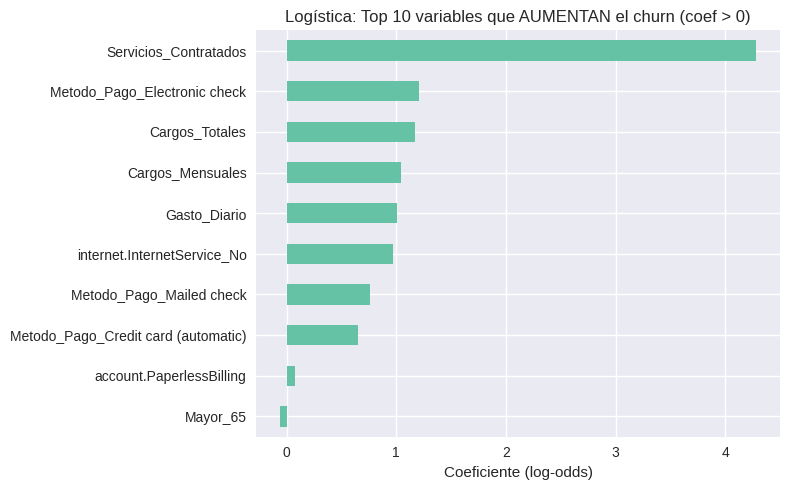

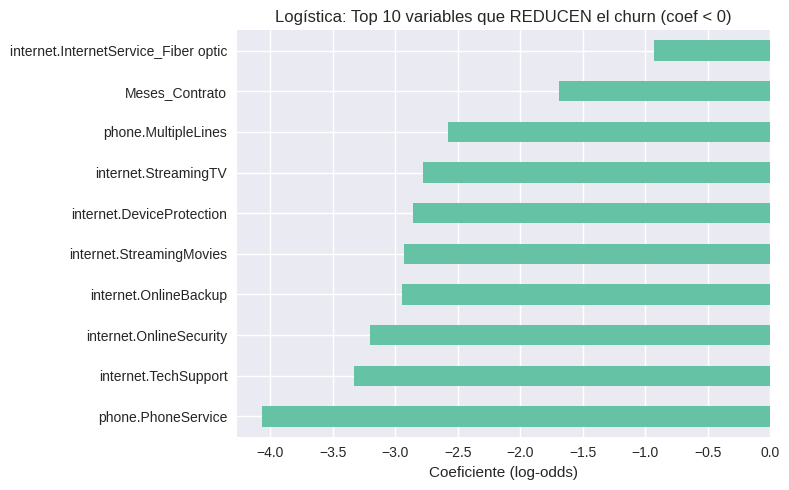

In [20]:
# Regresión Logística → coeficientes y odds ratios

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Nombres de variables (del X_train que usaste para entrenar)
feature_names = X_train.columns

# Coeficientes (log-odds)
coef_series = pd.Series(log_reg.coef_.ravel(), index=feature_names)

# Ordenados por magnitud (impacto absoluto)
coef_abs = coef_series.reindex(coef_series.abs().sort_values(ascending=False).index)

print("Top 15 (por magnitud de efecto, log-odds):\n")
display(coef_abs.head(15))

# Odds Ratios (exp(coef)) → >1 aumenta odds de churn, <1 reduce odds
odds = np.exp(coef_series).reindex(coef_abs.index)

print("\nTop 15 (mismos en OR):\n")
display(odds.head(15))

# Gráfico: 10 variables que más AUMENTAN churn (coef positivos)
top_pos = coef_series.sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
top_pos.sort_values().plot(kind='barh')
plt.title("Logística: Top 10 variables que AUMENTAN el churn (coef > 0)")
plt.xlabel("Coeficiente (log-odds)")
plt.tight_layout()
plt.show()

# Gráfico: 10 variables que más DISMINUYEN churn (coef negativos)
top_neg = coef_series.sort_values(ascending=True).head(10)
plt.figure(figsize=(8,5))
top_neg.sort_values().plot(kind='barh')
plt.title("Logística: Top 10 variables que REDUCEN el churn (coef < 0)")
plt.xlabel("Coeficiente (log-odds)")
plt.tight_layout()
plt.show()


# **Exportar Modelo**


In [22]:

import joblib

# Exportar modelos
joblib.dump(log_reg, 'modelo_logistica.pkl')
joblib.dump(rf, 'modelo_randomforest.pkl')

print("Modelos exportados con éxito")

Modelos exportados con éxito


**1. Factores que AUMENTAN el riesgo de cancelación (coeficiente positivo, OR > 1)**

**Servicios_Contratados (OR ≈ 72.3):** Esta variable aparece con un peso enorme en la regresión. La interpretación hay que tomarla con cuidado: probablemente la codificación refleja que cierta combinación de servicios contratados incrementa mucho las probabilidades de churn. Puede ser que cuando los clientes contratan un número muy específico de servicios (ni muy pocos ni muy muchos), se genere un patrón de abandono. Conviene revisarlo en más detalle porque el valor es muy alto.

**Método de Pago:** Electronic Check (OR ≈ 3.33) → Los clientes que pagan con cheque electrónico tienen más del triple de probabilidad de cancelar en comparación con otros métodos. Esto coincide con la correlación que ya habíamos observado.

**Cargos Totales (OR ≈ 3.22), Cargos Mensuales (OR ≈ 2.84) y Gasto Diario (OR ≈ 2.74)** Cuanto más altos son los pagos, más aumenta la probabilidad de churn. Esto refleja claramente una sensibilidad al precio.

**InternetService_No (OR ≈ 2.63)** Los clientes que no tienen servicio de internet presentan más probabilidad de cancelar, lo que indica que el servicio de internet es un factor de fidelización.


**2. Factores que REDUCEN el riesgo de cancelación (coeficiente negativo, OR < 1)**

**Phone Service (OR ≈ 0.017)** Tener servicio telefónico reduce de forma drástica la probabilidad de cancelar. Esto muestra que la telefonía fija o móvil funciona como un ancla de permanencia.

**Tech Support (OR ≈ 0.036), Online Security (OR ≈ 0.041), Online Backup (OR ≈ 0.053), Device Protection (OR ≈ 0.057), Streaming (Movies/TV, OR ≈ 0.05–0.06)**Los clientes que contratan servicios adicionales muestran una probabilidad mucho menor de churn. Estos servicios complementarios son claves para la fidelización.

**Meses de Contrato (OR ≈ 0.18)** A mayor tiempo de contrato, la probabilidad de churn disminuye. Esto confirma el hallazgo anterior: los contratos largos retienen mejor.

**Multiple Lines (OR ≈ 0.076)**Los clientes con varias líneas también muestran menor propensión a cancelar, lo que apunta al efecto de paquetización como estrategia de retención.

Random Forest - Importancia (Gini) - Top 15:



,0
Meses_Contrato,0.129572
Cargos_Totales,0.127008
Metodo_Pago_Electronic check,0.111783
Cargos_Mensuales,0.108490
Gasto_Diario,0.095829
internet.InternetService_Fiber optic,0.056651
internet.TechSupport,0.036162
internet.OnlineSecurity,0.033220
Tipo_Contrato_Two year,0.033033
customer.Partner,0.028714


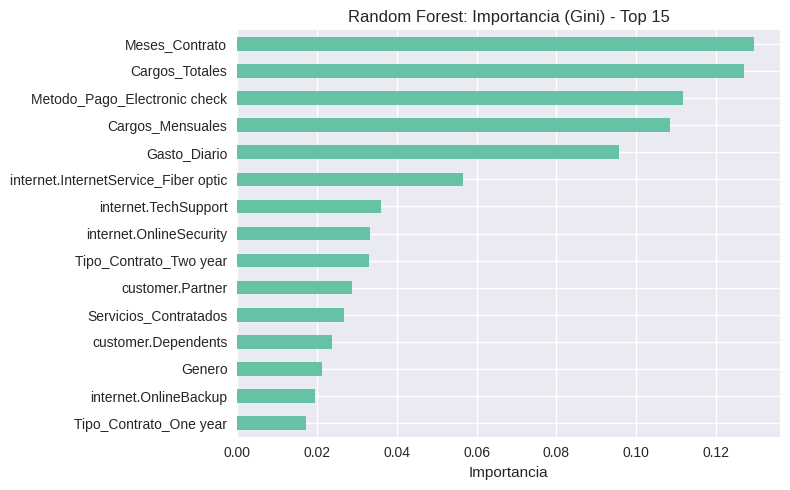


Random Forest - Permutation Importance - Top 15:



,0
Metodo_Pago_Electronic check,0.043383
internet.InternetService_Fiber optic,0.039025
Meses_Contrato,0.038638
internet.TechSupport,0.027405
Cargos_Totales,0.022369
internet.OnlineSecurity,0.015365
Gasto_Diario,0.009393
Genero,0.009103
Metodo_Pago_Credit card (automatic),0.007715
Metodo_Pago_Mailed check,0.007553


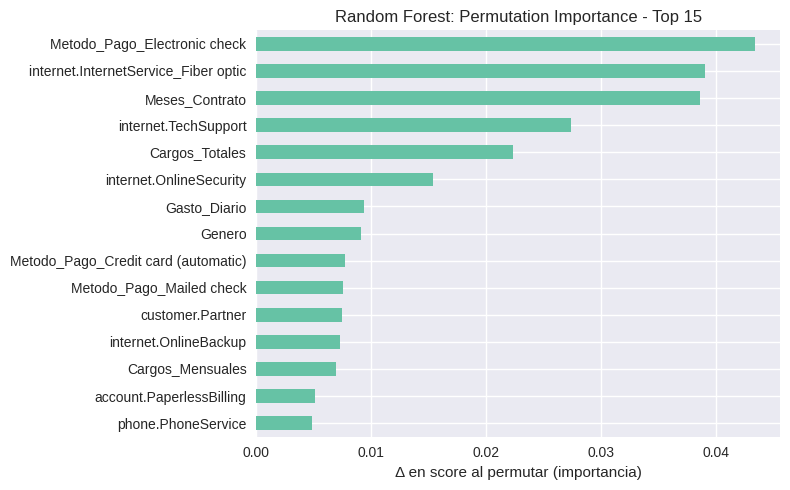

In [21]:
# Random Forest → importancia Gini + Permutation Importance

from sklearn.inspection import permutation_importance

# Importancia Gini (del modelo)
rf_gini = pd.Series(rf.feature_importances_, index=feature_names).sort_values(ascending=False)
print("Random Forest - Importancia (Gini) - Top 15:\n")
display(rf_gini.head(15))

plt.figure(figsize=(8,5))
rf_gini.head(15).sort_values().plot(kind='barh')
plt.title("Random Forest: Importancia (Gini) - Top 15")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

# Permutation Importance (más robusto y comparable entre modelos)
perm = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=-1)
rf_perm = pd.Series(perm.importances_mean, index=feature_names).sort_values(ascending=False)

print("\nRandom Forest - Permutation Importance - Top 15:\n")
display(rf_perm.head(15))

plt.figure(figsize=(8,5))
rf_perm.head(15).sort_values().plot(kind='barh')
plt.title("Random Forest: Permutation Importance - Top 15")
plt.xlabel("Δ en score al permutar (importancia)")
plt.tight_layout()
plt.show()


**1. Resultados por Importancia Gini**

Según el modelo, las variables más influyentes en la predicción de cancelación son:

Meses de Contrato (0.13) → La duración del contrato es el factor más importante: clientes con contratos más cortos tienden a cancelar más.

Cargos Totales (0.127) y Cargos Mensuales (0.108) → El nivel de gasto mensual y acumulado impacta directamente en el churn; clientes con costos altos cancelan más.

Método de Pago: Electronic Check (0.112) → Este método aparece como un fuerte predictor de cancelación.

Gasto Diario (0.095) → Similar a cargos, muestra sensibilidad al precio.

Internet: Fiber Optic (0.057) → Los clientes con fibra óptica presentan más riesgo de churn.

Servicios adicionales (Tech Support, Online Security, Online Backup) → Tenerlos ayuda a reducir la cancelación, aunque su peso es menor.

En este ranking, vemos que precio, método de pago y tiempo de contrato son los factores dominantes.

**2. Resultados por Permutation Importance**

La importancia basada en permutaciones mide cuánto empeora el modelo al desordenar cada variable. Aquí destacan:

Método de Pago: Electronic Check (0.043) → El predictor más crítico: desordenarlo afecta significativamente la predicción.

Internet: Fiber Optic (0.039) → Refuerza que este tipo de servicio está fuertemente asociado al churn.

Meses de Contrato (0.039) → Confirmación de la relevancia de la antigüedad del cliente.

Tech Support (0.027) y Online Security (0.015) → La ausencia de estos servicios incrementa la cancelación.

Cargos Totales (0.022) y Gasto Diario (0.009) → Factores relacionados con gasto siguen siendo importantes, aunque menos que en Gini.

Customer Partner (0.007) y Dependents (familiares dependientes) → Variables demográficas que influyen ligeramente en el churn.

# **Conclusión**

**Predicción de Cancelación (Churn) en Telecom X**

Entrenamos dos modelos: Regresión Logística (datos estandarizados) y Random Forest (sin necesidad de estandarización).

Random Forest obtuvo el mejor rendimiento (Accuracy 84.4%) y, sobre todo, mejor recall para la clase “canceló”, clave para anticiparse al churn.

Los factores más consistentes asociados al churn fueron: método de pago Electronic check, tiempo de contrato (tenure), nivel de cargos (mensuales y totales / gasto diario) y tipo de internet (Fiber optic).

Actúan como “protectores” de la permanencia: servicios adicionales (Tech Support, Online Security, Online Backup), contratos más largos y paquetización/múltiples líneas.

**Desempeño de los modelos**

**Regresión Logística:** Accuracy ≈ 82.8%. Métricas equilibradas (precision/recall ≈ 0.83) en ambas clases. Excelente como modelo interpretable base.

**Random Forest:** Accuracy ≈ 84.4%, con mayor recall en la clase de churn (detecta mejor a quienes efectivamente cancelan). Modelo recomendado para despliegue operativo.


**Factores que más influyen en la cancelación**

**Factores de riesgo (aumentan probabilidad de churn)**

Método de pago: Electronic check
Aparece arriba en coeficientes de Logística (OR > 3) y como el más importante por Permutation Importance en RF. Señal de mayor propensión al churn en este segmento.

Cargos (mensuales, totales, gasto diario)
Clientes con mayores pagos muestran mayor churn (consistente en correlación, Logística y RF). Sensibilidad al precio evidente.

Tipo de internet: Fiber optic
Figura alto en correlación y Permutation Importance. Indica posibles fricciones de calidad/precio/competencia en ese producto.

Baja antigüedad (Meses_Contrato)
Los primeros meses muestran más cancelaciones: churn temprano.

**Factores protectores (reducen probabilidad de churn)**

Servicios adicionales (Tech Support, Online Security, Online Backup)
Reiteradamente asociados a menor churn (coeficientes negativos en Logística, importancia en RF). Funcionan como anclas de valor.

Contratos más largos / tipo de contrato anual/bianual
Mayor permanencia; el componente de “tenure” estabiliza.

Paquetes / múltiples líneas / telefonía
La paquetización y líneas adicionales favorecen la fidelización.


**Estrategias de retención recomendadas**

A. Precio y facturación

Ofertas de contención para planes con cargos altos: descuentos por 3–6 meses, migración a planes más eficientes, o cap de cargo ante consumo atípico.

Campaña de cambio de método de pago: incentivar pasar de Electronic check a autopago con tarjeta o transferencia automática (bono de bienvenida, GB extra, descuento por 3 meses).

B. Experiencia y producto

Plan de mejora para Fiber optic: auditoría de calidad, SLA de reparación, contacto proactivo tras incidentes, encuesta NPS pos-incidencia con follow-up.

Onboarding de los primeros 90 días: check-ins en día 7 / 30 / 60, tutoriales de uso, “primeros beneficios”, canal de soporte prioritario.

Bundle inteligente: promover Tech Support / Online Security / Backup con paquetes a precio preferente (ej.: “Protección total + soporte priority” con descuento para clientes en riesgo).

C. Programas de fidelización

Beneficios por permanencia: upgrades o descuentos escalonados a los 6 y 12 meses.

Paquetización y multi-línea: ofertas “2×1” en líneas adicionales, descuentos por hogar completo.

D. Operación data-driven

Umbral del modelo calibrado al costo: optimizar recall de clase churn con precision mínima aceptable (coste de intervención vs. valor del cliente). Ajustar el threshold según objetivos de negocio.

Alertas de riesgo: disparadores cuando suben cargos, cambian método de pago a Electronic check, o hay incidencias técnicas repetidas.

A/B tests de retención: probar incentivos de cambio de método de pago, descuentos temporales, y bundles de servicios.